### 2. RF (Random Forest, 랜덤 포레스트) 🌲🌲🌲
여러 개의 의사결정나무를 앙상블(ensemble)로 결합하여 예측하는 모델. 의사결정나무들이 다수결로 판정함.

In [2]:
# 라이브러리

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# 1️. 데이터 로드
file_path = r"../mobile.csv"
df = pd.read_csv(file_path)

In [5]:
# 2️. X(features), y(target) 분리 / train, test 분리(8:2 비율)
X = df.drop(columns=["price_range"])  # df에서 name 속성 열만 제외
y = df["price_range"]  # df에서 name 속성 열만 가져옴

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 3. 랜덤 포레스트 모델 생성 (결정 트리 100개 사용), 모델 학습 (훈련 데이터 사용)
rf_model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
    # n_estimators=100: DT 모델을 100개 사용. 많으면 성능 향상 but 계산량 증가

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [8]:
# 4. 테스트 데이터 예측, 정확도 평가
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.2f}")

테스트 데이터 정확도: 0.37


In [9]:
# 5. 교차 검증 (5-fold)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"교차 검증 정확도 평균: {cv_scores.mean():.2f}")

교차 검증 정확도 평균: 0.35


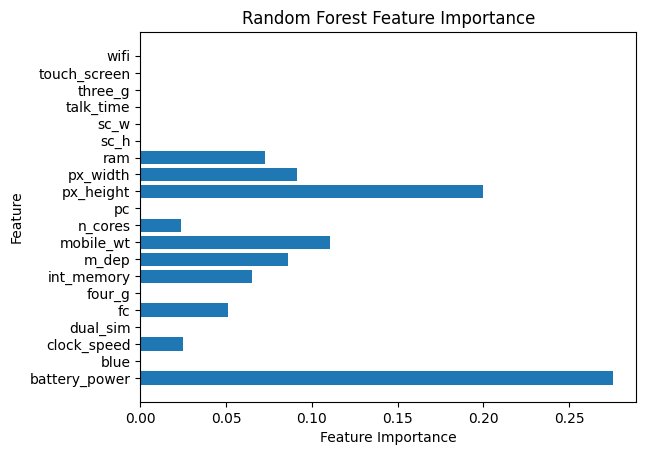

In [10]:
# 외전. 특성 중요도 추출(어떤 특성이 노드의 결정에 영향을 많이 주었는가)
feature_importances = rf_model.feature_importances_
    # 1이면 해당 특성만으로 모든 x의 y가 결정됨
    # 0이면 영향 X

# 시각화
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()